In [1]:
import sys
import os
from pathlib import Path

# project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# sys.path.append(project_root)

os.chdir(os.path.join(os.getcwd(), ".."))
print(Path.cwd())

d:\GMatXAI


In [ ]:
from tqdm import tqdm

import torch

from src.data.loader import get_loaders

train_loader, val_loader, test_loader = get_loaders(
    data_dir = "data/processed",
    target = ["formation_energy_per_atom", "band_gap"],
    batch_size = 64,
    num_workers = 0,
    train_ratio = 0.8,
    val_ratio = 0.1,
    onehot = False,
    jitter_std = 0.0,
    seed = 42
)

formation_energies = []
bandgaps = []

for batch in tqdm(train_loader):
    y = batch.y
    
    formation_energies.append(y[:, 0])  # formation_energy
    bandgaps.append(y[:, 1])            # bandgap

formation_energies = torch.cat(formation_energies, dim=0)
bandgaps = torch.cat(bandgaps, dim=0)

formation_mean = formation_energies.mean()
formation_std = formation_energies.std()

bandgap_mean = bandgaps.mean()
bandgap_std = bandgaps.std()

print(f"Formation Energy - Mean: {formation_mean.item():.6f}, Std: {formation_std.item():.6f}")
print(f"Bandgap          - Mean: {bandgap_mean.item():.6f}, Std: {bandgap_std.item():.6f}")



Total 105035 Data: Train(84028) / Val(10503) / Test(10504)


100%|██████████| 1312/1312 [01:41<00:00, 12.86it/s]

Formation Energy - Mean: -0.963344, Std: 1.072239
Bandgap         - Mean: 0.731060, Std: 1.417202


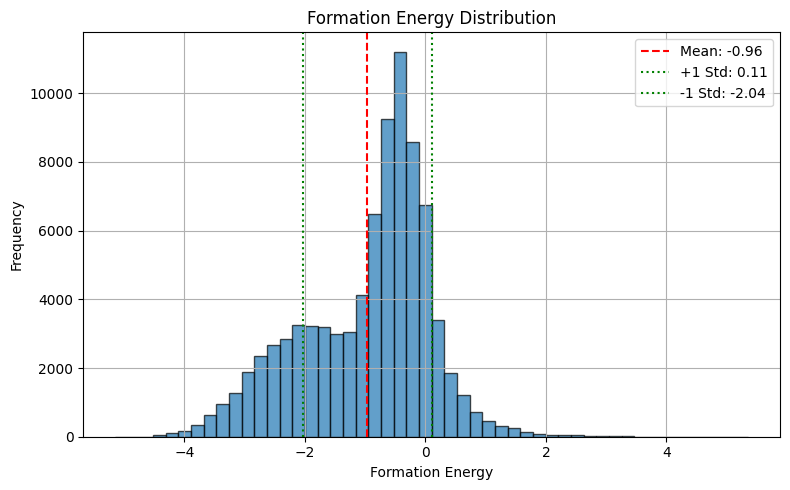

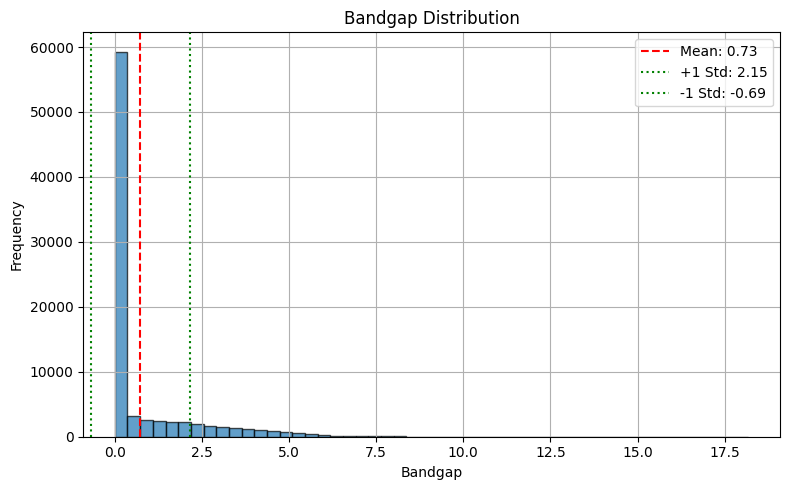

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(formation_energies.numpy(), bins=50, alpha=0.7, edgecolor='black')
plt.axvline(formation_mean, color='red', linestyle='--', label=f'Mean: {formation_mean:.2f}')
plt.axvline(formation_mean + formation_std, color='green', linestyle=':', label=f'+1 Std: {formation_mean + formation_std:.2f}')
plt.axvline(formation_mean - formation_std, color='green', linestyle=':', label=f'-1 Std: {formation_mean - formation_std:.2f}')
plt.title("Formation Energy Distribution")
plt.xlabel("Formation Energy")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(bandgaps.numpy(), bins=50, alpha=0.7, edgecolor='black')
plt.axvline(bandgap_mean, color='red', linestyle='--', label=f'Mean: {bandgap_mean:.2f}')
plt.axvline(bandgap_mean + bandgap_std, color='green', linestyle=':', label=f'+1 Std: {bandgap_mean + bandgap_std:.2f}')
plt.axvline(bandgap_mean - bandgap_std, color='green', linestyle=':', label=f'-1 Std: {bandgap_mean - bandgap_std:.2f}')
plt.title("Bandgap Distribution")
plt.xlabel("Bandgap")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Original Data Statistics:
Mean: -0.9633
Standard Deviation: 1.0722
Minimum: -5.1536
Maximum: 5.3597
Median: -0.6748
25th Percentile (Q1): -1.7071
75th Percentile (Q3): -0.2576
Skewness: -0.4699
Kurtosis: 0.2445

Normalized Data Statistics:
Mean: 0.0000
Standard Deviation: 1.0000
Minimum: -3.9079
Maximum: 5.8970
Median: 0.2691
25th Percentile (Q1): -0.6937
75th Percentile (Q3): 0.6582
Skewness: -0.4699
Kurtosis: 0.2445


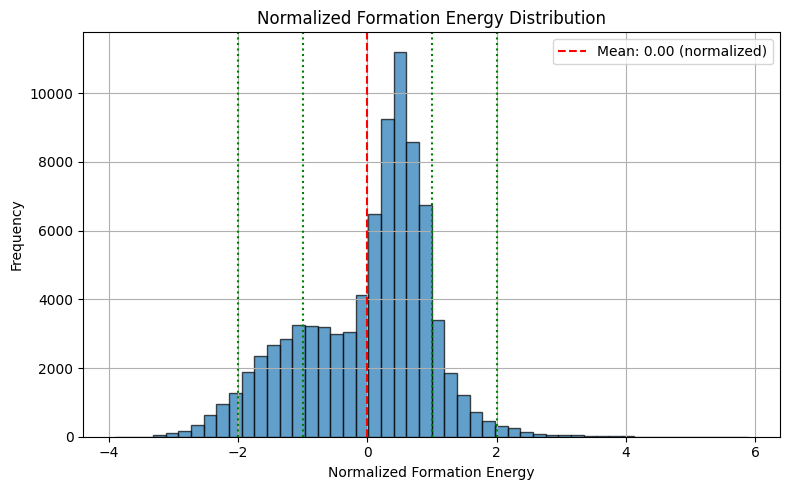

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def print_statistics(data, label="Data"):
    data = data.numpy()
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    minimum = np.min(data)
    maximum = np.max(data)
    median = np.median(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data, fisher=True)

    print(f"\n{label} Statistics:")
    print(f"Mean: {mean:.4f}")
    print(f"Standard Deviation: {std:.4f}")
    print(f"Minimum: {minimum:.4f}")
    print(f"Maximum: {maximum:.4f}")
    print(f"Median: {median:.4f}")
    print(f"25th Percentile (Q1): {q1:.4f}")
    print(f"75th Percentile (Q3): {q3:.4f}")
    print(f"Skewness: {skewness:.4f}")
    print(f"Kurtosis: {kurtosis:.4f}")
    return mean, std

mean, std = print_statistics(formation_energies, "Original Data")

normalized_data = (formation_energies - mean) / std

print_statistics(normalized_data, "Normalized Data")

plt.figure(figsize=(8, 5))
plt.hist(normalized_data.numpy(), bins=50, alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Mean: 0.00 (normalized)')
plt.axvline(-2, color='green', linestyle=':')
plt.axvline(-1, color='green', linestyle=':')
plt.axvline(1, color='green', linestyle=':')
plt.axvline(2, color='green', linestyle=':')
plt.title("Normalized Formation Energy Distribution")
plt.xlabel("Normalized Formation Energy")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
